In [1]:
import pandas as pd

#Machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, classification_report, confusion_matrix

#Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


# Exploratory data analysis
1) How many features?

2) How many data records?

3) Are there any missing values?

4) What is the target distribution?

In [4]:
#Dimension of the dataset
print(f"Dataset dimension: {df.shape}\n")
#Data types of the fields
print(f"Datatype: \n{df.dtypes}\n")
#Number of features in the dataset excluding target='price range'
print(f'Number of features: {df.shape[1] - 1}')

Dataset dimension: (2000, 21)

Datatype: 
battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

Number of features: 20


In [5]:
#Display the concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
#Checking for missing values
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [7]:
#Checking for duplicated values
df.duplicated().sum()

0

There are no missing and duplicated values in the train.csv dataset.

In [9]:
# Display descriptive statistics of full dataset
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [10]:
#Visualizing the target distribution
print(df['price_range'].value_counts())
print(f"Number of classes in target: {len(df['price_range'].unique())}")

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64
Number of classes in target: 4


There are equal number of target records for each class. The data is not imbalanced.
There are only 4 values the target can take, this is a classification problem that can be addressed by multinomial logistic regression.

# Explorations conclusion before train-test split

1) There are 20 features (x) in the train.csv dataset.

2) There are 2000 data records in the train.csv dataset.

3) There are no missing values or duplicated in the train.csv dataset.

4) There are 4 classes. Each classes contains 500 data records.

In [11]:
#Obtain target
y = df['price_range'].copy()
x = df.drop('price_range', axis=1)

In [12]:
#Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) #80-20 split

In [13]:
print(x_train.shape)
print(y_train.shape)
print()
print(x_test.shape)
print(y_test.shape)

(1600, 20)
(1600,)

(400, 20)
(400,)


# Exploratory Data Analysis on Training dataset

In [18]:
xy_train = x_train.copy()
xy_train['price_range'] = y_train
xy_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
816,805,1,0.7,0,0,0,64,0.1,97,4,...,641,704,418,11,6,17,0,1,1,0
790,911,1,2.9,0,0,0,46,0.1,181,5,...,461,670,363,9,5,17,0,1,0,0
361,899,0,0.5,1,13,1,57,0.9,172,2,...,788,1331,364,11,1,7,1,1,0,0
592,1263,0,0.5,0,12,0,64,0.3,175,5,...,178,1883,1183,14,3,17,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1791,1203,1,0.5,1,0,1,11,0.9,109,2,...,35,510,1672,17,13,19,1,1,0,0
1096,1154,0,2.0,0,6,1,35,0.8,159,5,...,1003,1827,3262,16,15,16,1,0,0,3
1932,718,1,1.6,1,1,1,30,0.4,93,3,...,662,997,1601,10,9,12,1,1,1,1
235,1523,1,1.8,0,6,1,11,0.1,129,1,...,148,1606,707,19,8,19,1,1,0,0


In [19]:
xy_train['price_range'].unique()

array([1, 0, 2, 3])

In [20]:
xy_train['price_range'].value_counts()

0    408
1    404
2    394
3    394
Name: price_range, dtype: int64

In [21]:
#Visualizing the training dataset
xy_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,...,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,1247.944375,0.495625,1.512812,0.516875,4.308750,0.518125,32.389375,0.501313,139.647500,4.528750,...,640.108750,1246.838125,2112.836250,12.306250,5.725000,10.975000,0.755000,0.510000,0.506875,1.483750
std,435.784745,0.500137,0.816676,0.499871,4.332021,0.499828,18.179434,0.289926,35.046411,2.294551,...,441.883112,433.819613,1093.525061,4.198926,4.359042,5.425889,0.430222,0.500056,0.500109,1.119383
min,503.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,862.750000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,278.000000,866.750000,1179.000000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.000000
50%,1250.000000,0.000000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,139.000000,4.000000,...,561.500000,1243.500000,2118.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.000000
75%,1620.000000,1.000000,2.200000,1.000000,7.000000,1.000000,48.250000,0.800000,169.000000,7.000000,...,937.250000,1630.250000,3060.000000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.000000
max,1998.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


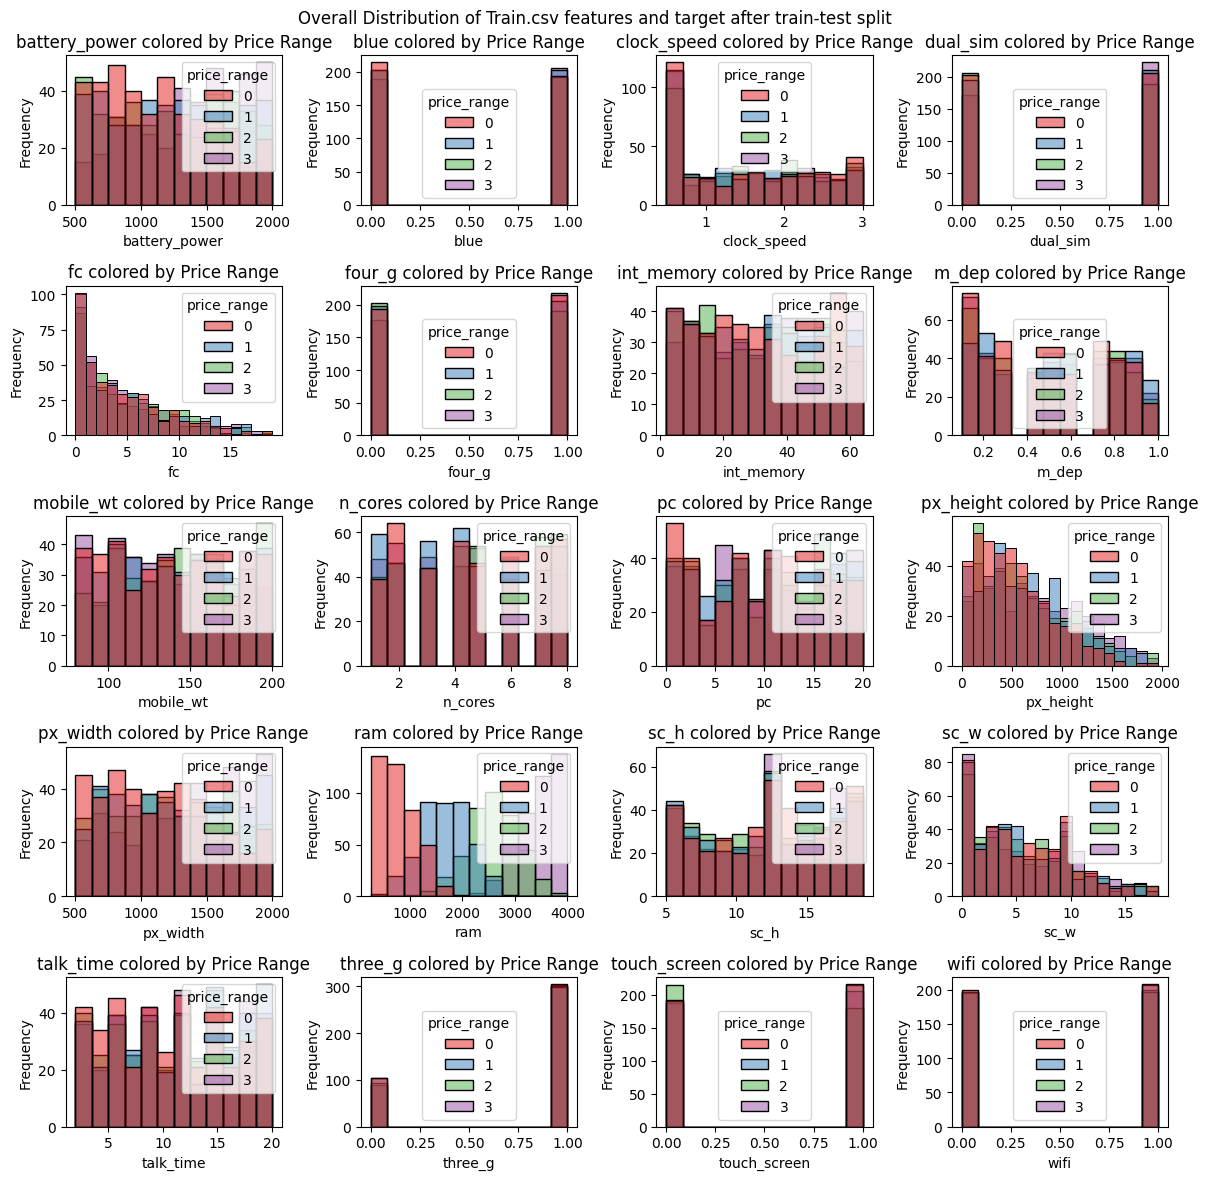

In [22]:
custom_palette = sns.color_palette("Set1", n_colors=len(xy_train['price_range'].unique()))
features = xy_train.columns.tolist()[:-1] #exclude class and target
fig, axes = plt.subplots(5, 4, figsize=(12, 12))
axes=axes.ravel()

for i, feature in enumerate(features):
    sns.histplot(data=xy_train, x=feature, hue='price_range', ax=axes[i], palette=custom_palette, alpha=0.5)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'{feature} colored by Price Range')

plt.suptitle('Overall Distribution of Train.csv features and target after train-test split')
plt.tight_layout()
plt.show()

In [23]:
#Identify the top 3 features of all the features that can explain the target.
#Correlation method
corr = xy_train.corr()
corr.style.background_gradient(cmap='coolwarm')
#RAM (strong positive correlation)
#battery_power (low positive correlation)
#px_width (low positive correlation)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,-0.003067,0.027503,-0.034632,0.035270,0.010515,0.007040,0.020912,0.016168,-0.020191,0.022645,0.013875,-0.017079,-0.009544,-0.037969,-0.009227,0.027344,0.015732,0.008691,0.004663,0.184697
blue,-0.003067,1.000000,0.035736,0.057830,0.008417,0.002819,0.036402,0.006725,-0.001551,0.037984,0.002078,-0.016360,-0.049622,0.036735,-0.000851,-0.024935,0.021392,-0.025330,0.018930,-0.027383,0.027241
clock_speed,0.027503,0.035736,1.000000,0.005521,0.001321,-0.044770,-0.004359,-0.025427,0.022644,-0.020137,0.021282,-0.022486,-0.010750,0.009991,-0.043292,-0.027680,0.005873,-0.048375,0.030084,-0.032907,-0.000080
dual_sim,-0.034632,0.057830,0.005521,1.000000,-0.050927,-0.006231,-0.022780,-0.030144,-0.007228,-0.025232,-0.029817,-0.001495,0.024559,0.053669,0.005879,-0.004183,-0.029128,-0.012752,-0.031950,0.024552,0.030109
fc,0.035270,0.008417,0.001321,-0.050927,1.000000,-0.006630,-0.048507,-0.015759,0.034998,-0.016119,0.643726,-0.005676,0.001113,0.017412,-0.017407,-0.018055,-0.002678,0.006386,-0.013840,0.018360,0.027990
four_g,0.010515,0.002819,-0.044770,-0.006231,-0.006630,1.000000,0.003387,-0.005559,-0.021270,-0.022539,0.002239,-0.014300,0.012642,0.002511,0.033708,0.047067,-0.041110,0.590690,0.030551,-0.045533,0.013381
int_memory,0.007040,0.036402,-0.004359,-0.022780,-0.048507,0.003387,1.000000,-0.016626,-0.030645,-0.041041,-0.039280,0.006116,-0.021243,0.017965,0.036705,0.023702,0.006946,-0.026256,-0.026123,0.006756,0.034378
m_dep,0.020912,0.006725,-0.025427,-0.030144,-0.015759,-0.005559,-0.016626,1.000000,0.017876,-0.000292,0.008428,0.014409,0.030144,-0.004384,-0.018876,-0.024011,0.006302,-0.019481,-0.010228,-0.024432,0.004787
mobile_wt,0.016168,-0.001551,0.022644,-0.007228,0.034998,-0.021270,-0.030645,0.017876,1.000000,-0.017489,0.027534,0.016017,0.006315,0.023639,-0.034833,-0.020956,0.019404,-0.005317,0.006125,0.006668,0.000300
n_cores,-0.020191,0.037984,-0.020137,-0.025232,-0.016119,-0.022539,-0.041041,-0.000292,-0.017489,1.000000,-0.005393,-0.012778,0.040754,-0.011732,0.005317,0.014609,0.028539,-0.011232,0.013921,-0.035324,-0.004444


In [24]:
print(0, 'min RAM', xy_train[xy_train['price_range'] == 0]['ram'].min(), 'max RAM', xy_train[xy_train['price_range'] == 0]['ram'].max())
print(1, 'min RAM', xy_train[xy_train['price_range'] == 1]['ram'].min(),'max RAM', xy_train[xy_train['price_range'] == 1]['ram'].max())
print(2, 'min RAM', xy_train[xy_train['price_range'] == 2]['ram'].min(),'max RAM', xy_train[xy_train['price_range'] == 2]['ram'].max())
print(3, 'min RAM', xy_train[xy_train['price_range'] == 3]['ram'].min(),'max RAM', xy_train[xy_train['price_range'] == 3]['ram'].max())

0 min RAM 256 max RAM 1974
1 min RAM 387 max RAM 2811
2 min RAM 1185 max RAM 3801
3 min RAM 2294 max RAM 3998


As observed from the histogram, it seems that only RAM has a distinct distribution for the price range. This can further be confirmed by the correlation plot. Therefore, RAM is the variable that can determine the price range and identifying which number corresponds to the highest price range.

A more targeted visualization using the top 3 highest corelation features with the target is plotted.

In [25]:
#Visualizing with the top 3 features
features = ['ram', 'battery_power', 'px_width']
features_target = ['ram', 'battery_power', 'px_width', 'price_range']
x_train_new = x_train[features]
x_test_new = x_test[features]
xy_train_visualize_new = xy_train[features_target]

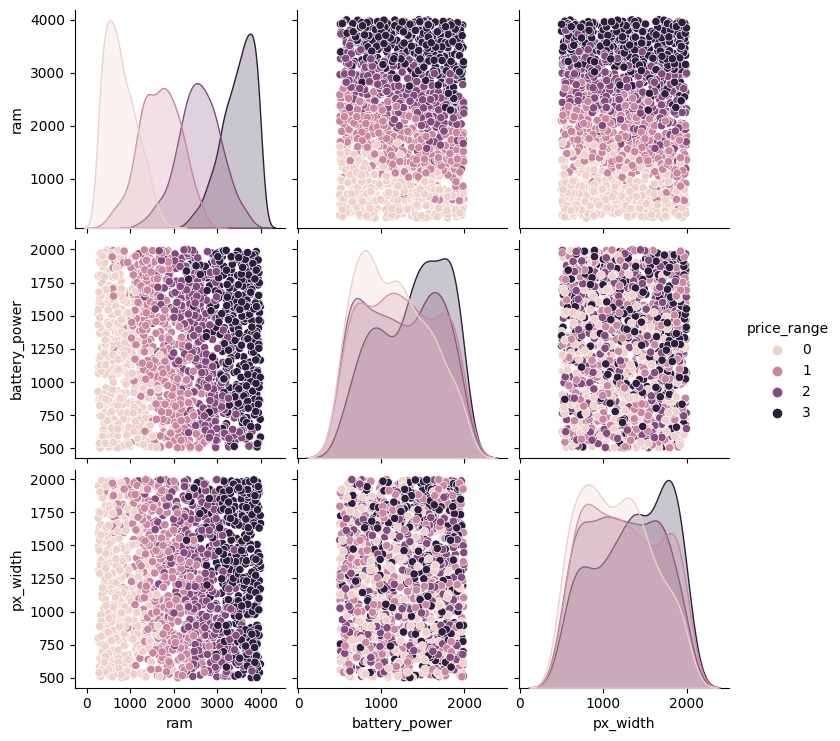

In [27]:
sns.pairplot(xy_train_visualize_new, hue='price_range')
plt.show()

Based on the feature, RAM, which has the highest positive correlation (0.915) with the target price_range. The higher the RAM corresponds to higher price range as it is likely to cost more to get higher RAM for mobile devices. Therefore:

0: seems to correspond to the lowest price range

1: seems to correspond to the second lowest price range

2: seems to correspond to the third lowest price range

3: seems to correspond to the highest price range.

and the number that corresponds to the highest mobile price is 3.

# Model training
As there are 4 target classes, linear regression is unsuitable as it is used for predicting numerical values.

Therefore, 2 alogrithms will be proposed for this problem.

1) Naive Bayes as the baseline model that assumes the conditional independence among the features given the class labels.

2) Multinomial Logistic Regression as the classification model.

All the features will be used to train the model.

In [28]:
x_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
674,1034,0,2.6,1,2,1,45,0.3,190,3,4,182,1293,969,15,1,7,1,0,0
1699,1002,1,1.8,0,1,0,45,0.7,180,7,7,948,1007,1234,19,13,18,1,1,0
1282,609,1,0.5,0,4,1,10,0.1,81,6,6,113,1524,1905,16,3,18,1,1,1
1315,1510,0,0.6,1,1,0,32,0.7,135,3,8,963,1520,854,8,2,10,1,0,1
1210,805,1,1.7,1,0,1,58,0.9,168,3,10,81,1544,3397,7,6,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1266,0,1.9,1,0,1,7,0.2,184,3,12,346,1468,2532,10,5,4,1,1,1
763,1741,1,1.8,0,0,0,14,0.7,143,8,0,730,1895,3387,11,3,3,1,0,0
385,1880,1,1.8,0,4,1,18,0.7,138,3,5,71,699,3333,17,15,7,1,0,0
1667,1967,0,0.5,0,0,1,46,0.6,199,1,7,518,1374,1567,15,2,7,1,1,0


In [29]:
#Training the Naive Bayes model
nb = GaussianNB()
nb.fit(x_train, y_train)
nb_pred = nb.predict(x_test)

In [30]:
#Training the Logistic Regression model
log = LogisticRegression(max_iter=10000)
log.fit(x_train, y_train)
log_pred = log.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The converagence error could be due to the large number of features fed into the logistic regression model, resulting in insufficient iterations to obtain the optimal solution. Therefore, the actual accuracy rate of the logistic regression model could be higher if more iterations are performed.

In [31]:
#Scaling the dataset
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [32]:
#Logistic Regression with the scaled dataset
log2 = LogisticRegression()
log2.fit(x_train_scaled, y_train)
log_pred2 = log2.predict(x_test_scaled)

In [33]:
#Naive Bayes with the scaled dataset
nb2 = GaussianNB()
nb2.fit(x_train_scaled, y_train)
nb_pred2 = nb2.predict(x_test_scaled)

The model performances can be compared using the performance metrics of accuracy, precision, recall, f1_score.

These metrics are selected as the following problem is a classification problem.


In [34]:
accuracy_nb = accuracy_score(nb_pred, y_test) #Compare the predicted result with the actual result
print(f"Accuracy of Naive Bayes model: {accuracy_nb:.2f}")

accuracy_log = accuracy_score(log_pred, y_test)
print(f"Accuracy of Logistic Regression model: {accuracy_log:.2f}")

accuracy_nb2 = accuracy_score(nb_pred2, y_test)
print(f"Accuracy of Naive Bayes model (scaled): {accuracy_nb2:.2f}")

accuracy_log2 = accuracy_score(log_pred2, y_test)
print(f"Accuracy of Logistic Regression model (scaled): {accuracy_log2:.2f}")

Accuracy of Naive Bayes model: 0.76
Accuracy of Logistic Regression model: 0.79
Accuracy of Naive Bayes model (scaled): 0.76
Accuracy of Logistic Regression model (scaled): 0.96


Inspecting the overall accuracy of the 4 models, the scaled logistic regression model outperformed the other models with a 96% accuracy rate.

## Classification report and confusion matrix for models without scaling

Classification Report for Naive Bayes Without Scaling
              precision    recall  f1-score   support

           0       0.88      0.86      0.87        92
           1       0.65      0.69      0.67        96
           2       0.65      0.68      0.67       106
           3       0.87      0.81      0.84       106

    accuracy                           0.76       400
   macro avg       0.76      0.76      0.76       400
weighted avg       0.76      0.76      0.76       400



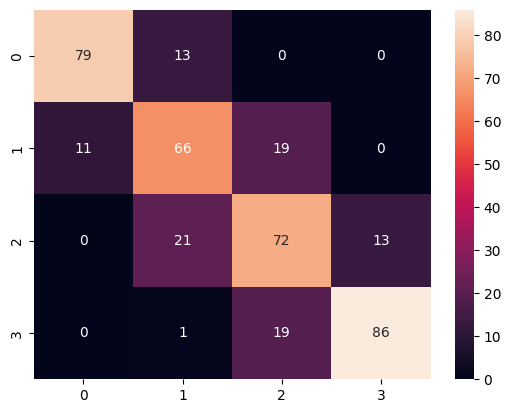


Classification Report for Logistic Regression Without Scaling
              precision    recall  f1-score   support

           0       0.93      0.90      0.92        92
           1       0.75      0.80      0.77        96
           2       0.67      0.66      0.67       106
           3       0.82      0.80      0.81       106

    accuracy                           0.79       400
   macro avg       0.79      0.79      0.79       400
weighted avg       0.79      0.79      0.79       400



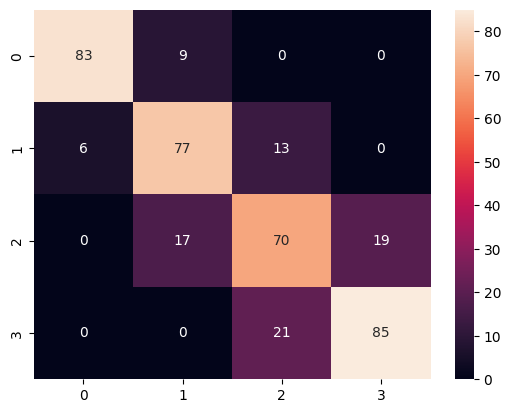

In [35]:
#Classification Report
print(f"Classification Report for Naive Bayes Without Scaling")
print(classification_report(y_test, nb_pred))
cm = confusion_matrix(y_test, nb_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

print()

print(f"Classification Report for Logistic Regression Without Scaling")
print(classification_report(y_test, log_pred))
cm2 = confusion_matrix(y_test, log_pred)
sns.heatmap(cm2, annot=True, fmt='d')
plt.show()

## Classification report and confusion matrix for models with scaling

Classification Report for Naive Bayes Scaled
              precision    recall  f1-score   support

           0       0.88      0.86      0.87        92
           1       0.65      0.69      0.67        96
           2       0.65      0.68      0.67       106
           3       0.87      0.81      0.84       106

    accuracy                           0.76       400
   macro avg       0.76      0.76      0.76       400
weighted avg       0.76      0.76      0.76       400



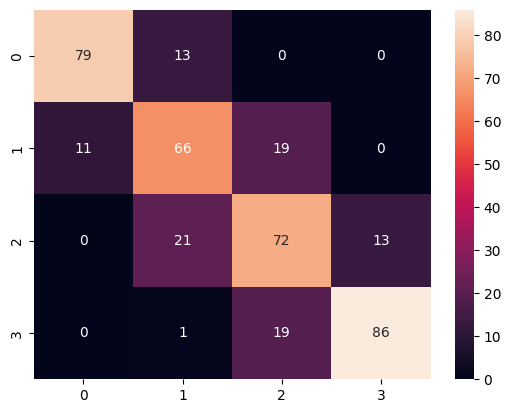


Classification Report for Logistic Regression Scaled
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        92
           1       0.93      0.96      0.94        96
           2       0.95      0.93      0.94       106
           3       0.99      0.96      0.98       106

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



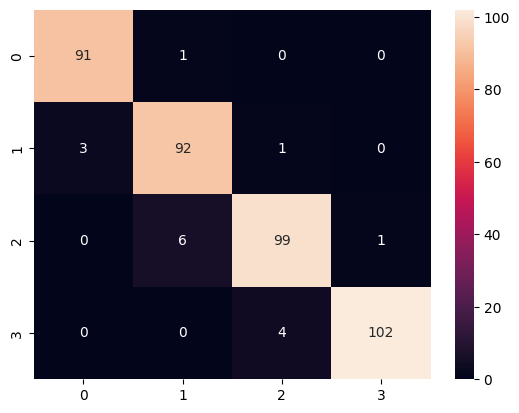

In [36]:
print(f"Classification Report for Naive Bayes Scaled")
print(classification_report(y_test, nb_pred2))
cm3 = confusion_matrix(y_test, nb_pred2)
sns.heatmap(cm3, annot=True, fmt='d')
plt.show()

print()

print(f"Classification Report for Logistic Regression Scaled")
print(classification_report(y_test, log_pred2))
cm4 = confusion_matrix(y_test, log_pred2)
sns.heatmap(cm4, annot=True, fmt='d')
plt.show()

Evaluating the performance metrics of precision, recall, f1 score, macro and weighted average, the scaled logistic regression model has a better performance compared to all the other models.

This suggests that the scaled logistic regression model has minimized false positives (precision), false negatives (recall) and a better harmoinc mean of the precision and recall metric (f1 score).

In addition, scaling the features allows the logistic regression to derive at an optimal solution with lesser iterations.

Therefore, the scaled logistic regression model is the champion model and should be deployed to predict the price_range out of all the other models.